# SuperCandy

In [1]:
%matplotlib inline
from IPython.display import display, Markdown

import numpy as np
import sklearn.model_selection as sk_model_selection
import sklearn.metrics         as sk_metrics

# Custom modules developed for this problem
import candydata
import mlaction
import mlvis

## Data Exploration

In [2]:
df_orig = candydata.load_data()
Markdown(f"The data consists of {len(df_orig.index)} samples.")

The data consists of 85 samples.

In [3]:
display(df_orig.head(n=10))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


### Show candy ranking (sorted by "winpercent")

In [4]:
Markdown(f"'winpercent' ranges from {df_orig['winpercent'].min()} to {df_orig['winpercent'].max()}.")

'winpercent' ranges from 22.445341 to 84.18029.

In [5]:
display(df_orig.sort_values(by = 'winpercent', ascending = False))

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese’s Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese’s Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824


### Analyze features
Grouping candies which have identical binary feature vectors

In [6]:
features_binary = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']

df_unique_featvecs = candydata.generate_unique_featvec_df(df_orig, features_binary)

Markdown(f"There are only {len(df_unique_featvecs.index)} unique binary feature vectors:")

There are only 29 unique binary feature vectors:

Highlight feature vectors for which the associated sweets' winpercentage values differ more than 20 percentage points.

In [7]:
mlvis.highlight_differences(df_unique_featvecs, cols = ['wp_min', 'wp_max'], thresh = 20.0)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,comment,wp_min,wp_max
0,1,0,1,0,0,1,0,1,0,"100 Grand, Twix",66.971725,81.642914
1,1,0,0,0,1,0,0,1,0,"3 Musketeers, Charleston Chew",38.975037,67.602936
2,0,0,0,0,0,0,0,0,0,"One dime, One quarter",32.261086,46.116505
3,0,1,0,0,0,0,0,0,0,"Air Heads, Laffy Taffy, Lifesavers big ring gummies, Super Bubble, Twizzlers",27.303865,52.911392
4,1,0,0,1,0,0,0,1,0,"Almond Joy, Mr Good Bar, Nestle Butterfinger",50.347546,70.735641
5,1,0,1,1,1,0,0,1,0,"Baby Ruth, Snickers",56.914547,76.673782
6,0,0,0,1,0,0,0,0,1,Boston Baked Beans,23.417824,23.417824
7,0,0,0,0,0,0,0,0,1,"Candy Corn, Haribo Happy Cola, Pixie Sticks",34.158958,38.010963
8,0,1,1,0,0,0,0,0,0,Caramel Apple Pops,34.517681,34.517681
9,0,1,0,0,0,0,0,0,1,"Chewey Lemonhead Fruit Mix, Chiclets, Dots, Fruit Chews, Haribo Gold Bears, Haribo Sour Bears, Haribo Twin Snakes, Mike & Ike, Nik L Nip, Now & Later, Red vines, Skittles original, Skittles wildberry, Sour Patch Kids, Sour Patch Tricksters, Starburst, Swedish Fish, Trolli Sour Bites, Welch’s Fruit Snacks",22.445341,67.037628


## Feature Selection and Model Fitting

In [8]:

# features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent']
# features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus']
features = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer']
  
names, X, wp = candydata.get_featvecs(df_orig, features)

### Split data into training and test sets.
There is no real model selection here, therefore no separate validation set needed.
If there was a model selection, cross-validation should be used due to lack of data, i.e., in that case there is no need for a validation dataset either.

In [9]:
X_train, X_test, wp_train, wp_test, names_train, names_test = \
  sk_model_selection.train_test_split(X, wp, names, test_size=0.2, random_state=1337)

### Fit logistic regression

In [10]:
clf = mlaction.fit_logreg_linear(X_train, wp_train, features)

Optimization terminated successfully.
         Current function value: 0.659290
         Iterations 4


## Model Evaluation

In [11]:
print(clf.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   68
Model:                          Logit   Df Residuals:                       62
Method:                           MLE   Df Model:                            5
Date:                Sun, 11 Oct 2020   Pseudo R-squ.:                 0.04855
Time:                        19:50:54   Log-Likelihood:                -44.832
converged:                       True   LL-Null:                       -47.119
Covariance Type:            nonrobust   LLR p-value:                    0.4699
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
chocolate            0.4581      0.385      1.190      0.234      -0.296       1.213
fruity               0.1276      0.377      0.338      0.735      -0.612       0.867
caramel              0.0253 

In [12]:
# Compute confusion matrix on training and test set
confmat_train = mlaction.compute_confmat(clf, X_train, wp_train)
confmat_test  = mlaction.compute_confmat(clf, X_test,  wp_test)

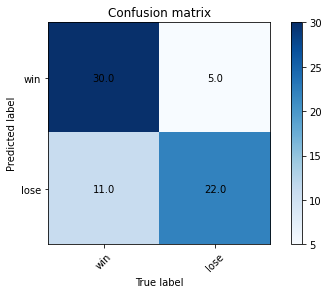

In [13]:
mlvis.plot_confusion_matrix(confmat_train, ['win', 'lose'])

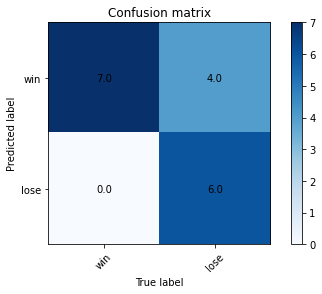

In [14]:
mlvis.plot_confusion_matrix(confmat_test, ['win', 'lose'])

### Analyze Mis-Classifications on Test Set

In [15]:
wp_pred = clf.predict(X_test)

mean_squared_error = sk_metrics.mean_squared_error(wp_test, wp_pred)
r_squared          = sk_metrics.r2_score(wp_test, wp_pred)

print(f'Mean squared error:           {mean_squared_error}')
print(f'Coefficient of determination: {r_squared}')


df_test = df_orig.loc[df_orig['competitorname'].isin(names_test)].copy(deep=True)

df_test = df_test.rename(columns={'winpercent': 'wp_gt'})
df_test.loc[:, 'wp_est'] = float('nan')

for idx, name in enumerate(names_test):
    X_curr = np.take(X_test, [idx], axis=0)
    df_test.loc[df_test['competitorname'] == name, 'wp_est'] = clf.predict(X_curr)[0] * 100.0

mlvis.highlight_class_mismatches(df_test, cols = ['wp_gt', 'wp_est'], thresh = 50.0)

Mean squared error:           0.016666575764784808
Coefficient of determination: 0.38777881478464327


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,wp_gt,wp_est
2,One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086,36.942141
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465000,0.767000,50.347546,64.305758
10,Charleston Chew,1,0,0,0,1,0,0,1,0,0.604000,0.511000,38.975037,55.100815
11,Chewey Lemonhead Fruit Mix,0,1,0,0,0,0,0,0,1,0.732000,0.511000,36.017628,43.057964
15,Fruit Chews,0,1,0,0,0,0,0,0,1,0.127000,0.034000,43.088924,43.057964
21,Haribo Twin Snakes,0,1,0,0,0,0,0,0,1,0.465000,0.465000,42.178772,43.057964
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313000,0.511000,76.768600,54.944478
32,Peanut butter M&M’s,1,0,0,1,0,0,0,0,1,0.825000,0.651000,71.465050,64.305758
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604000,0.651000,73.099556,56.351408
43,Nestle Crunch,1,0,0,0,0,1,0,1,0,0.313000,0.767000,66.470680,54.944478


## Find the Ultimate Candy

### Generate a data frame with all possible combinations of features.

In [16]:
df_allcandy = candydata.generate_all_candy_df(features)

###  Match real sweets with artificial sweets
Extend the table of all possible sweets with actually existing ones (as a reference)

In [17]:
candydata.match_candies(df_allcandy, df_orig, features)

### Apply model to artificial sweets

In [18]:
X_allcandy = candydata.get_featvecs(df_allcandy, features, featvecs_only = True)

df_allcandy.loc[:, "wp_est"] = clf.predict(X_allcandy)

### Explore highest ranking sweets
Outputting a list of many high ranking sweets, to align with the existing candy portfolio

In [19]:
display(df_allcandy.sort_values(by = 'wp_est', ascending = False).head(n = 50))

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,wp_est,comment
60,1,1,1,1,0,0,0.709831,(unique)
52,1,1,0,1,0,0,0.699280,(unique)
62,1,1,1,1,1,0,0.672120,(unique)
61,1,1,1,1,0,1,0.670727,(unique)
56,1,1,1,0,0,0,0.665393,(unique)
54,1,1,0,1,1,0,0.660853,(unique)
53,1,1,0,1,0,1,0.659436,(unique)
44,1,0,1,1,0,0,0.654607,(unique)
48,1,1,0,0,0,0,0.654014,Tootsie Pop
36,1,0,0,1,0,0,0.643058,"Almond Joy, Peanut butter M&M’s, Mr Good Bar, ..."


### Ingredients of the super candy:

In [20]:
df_allcandy.sort_values(by = 'wp_est', ascending = False).head(n = 1)[features]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer
60,1,1,1,1,0,0
